# Linear Classifier with TensorFlow
Create two clouds of 1000 points and train a model to predict which cloud a point belongs to.

Code based on example by Francois Chollet in *Deep Learning with Python, Second Edition*.

In [30]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [31]:
# Set the number of samples 
NUM_SAMPLES = 1_000

In [32]:
samples0 = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, .5], [.5, 1]], # oval-like cloud from bL to tR
    size=NUM_SAMPLES
)

samples1 = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, .5], [.5, 1]],
    size=NUM_SAMPLES
)

In [33]:
# Vertically stack two samples into one `inputs` variable.
inputs = np.vstack(tup=(samples0, samples1)).astype(np.float32)

In [34]:
# Generate corresponding target labels.
# targets[i, 0] == 0 if inputs[i] is samples0
# targets[i, 0] == 1 if inputs[i] is samples1
targets = np.vstack(tup=(np.zeros(shape=(NUM_SAMPLES, 1), dtype='float32'),
                         np.ones(shape=(NUM_SAMPLES, 1), dtype='float32')))

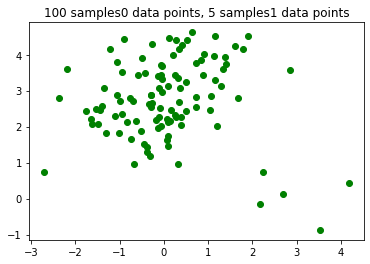

In [35]:
# Plot 100 samples 0 and 5 samples1 to visualize some data.
plt.scatter(x=inputs[900:1005,0],
            y=inputs[900:1005, 1],
            c='g')
plt.title("100 samples0 data points, 5 samples1 data points")
plt.show()

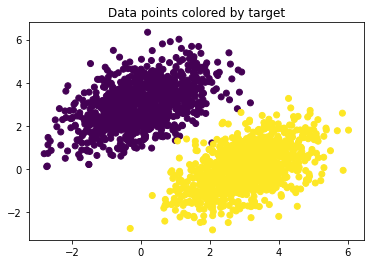

In [36]:
# Plot data and color by target
plt.scatter(x=inputs[:, 0],
            y=inputs[:, 1],
            c=targets[:, 0])
plt.title("Data points colored by target")
plt.show()

In [37]:
# Define linear classifier that will learn to separate the two blobs.
dimInput = 2
dimOutput = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(dimInput, dimOutput)))
b = tf.Variable(initial_value=tf.zeros(shape=(dimOutput,)))

Note forward pass function is simplest version here:

$prediction = W \cdot input + b$

In [38]:
# Define forward pass function
def model(inputs):
  return tf.matmul(inputs, W) + b

# Define loss function
def square_loss(predictions, targets):
  perSampleLosses = tf.square(predictions - targets)
  return tf.reduce_mean(input_tensor=perSampleLosses)

# Define training step, update W and b, minimize loss.
LEARNING_RATE = 0.1 # Bigger value because batch training.

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  W_gradLoss, b_gradLoss = tape.gradient(loss, [W, b])
  W.assign_sub(W_gradLoss * LEARNING_RATE)
  b.assign_sub(b_gradLoss * LEARNING_RATE)
  return loss

In [39]:
# Take training step.
for step in range(1):
  loss = training_step(inputs, targets)
  print("Loss at step %d: %.4f" % (step, loss))

Loss at step 0: 3.9300


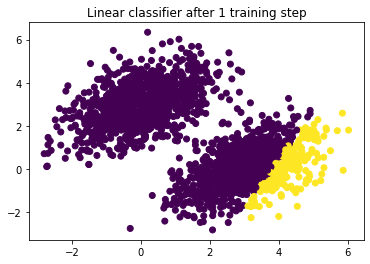

In [40]:
predictions = model(inputs)
plt.scatter(x=inputs[:, 0],
            y=inputs[:, 1],
            c=(predictions[:, 0] > 0.5))
plt.title("Linear classifier after 1 training step")
plt.show()

Loss at step 1: 0.3464
Loss at step 2: 0.1499


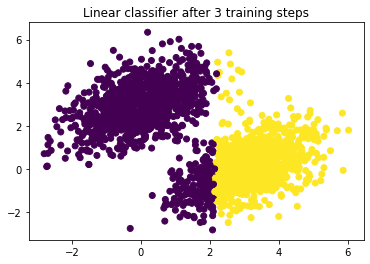

In [41]:
# Take training steps.
for step in range(2):
  loss = training_step(inputs, targets)
  predictions = model(inputs)
  print("Loss at step %d: %.4f" % (step+1, loss))
plt.scatter(x=inputs[:, 0],
            y=inputs[:, 1],
            c=(predictions[:, 0] > 0.5))
plt.title("Linear classifier after 3 training steps")
plt.show()

Loss at step 3: 0.1167
Loss at step 4: 0.1060
Loss at step 5: 0.0988
Loss at step 6: 0.0925
Loss at step 7: 0.0868
Loss at step 8: 0.0816
Loss at step 9: 0.0769
Loss at step 10: 0.0725
Loss at step 11: 0.0685
Loss at step 12: 0.0649
Loss at step 13: 0.0615
Loss at step 14: 0.0585
Loss at step 15: 0.0557
Loss at step 16: 0.0531
Loss at step 17: 0.0508
Loss at step 18: 0.0486
Loss at step 19: 0.0466
Loss at step 20: 0.0448
Loss at step 21: 0.0432
Loss at step 22: 0.0417
Loss at step 23: 0.0403
Loss at step 24: 0.0390
Loss at step 25: 0.0379
Loss at step 26: 0.0368
Loss at step 27: 0.0358
Loss at step 28: 0.0350
Loss at step 29: 0.0341


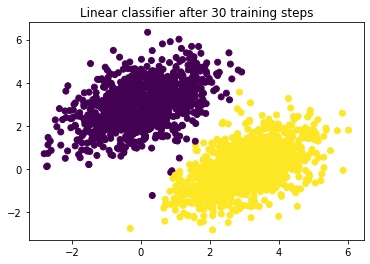

In [42]:
# Take several training steps.
for step in range(27):
  loss = training_step(inputs, targets)
  predictions = model(inputs)
  print("Loss at step %d: %.4f" % (step+3, loss))
plt.scatter(x=inputs[:, 0],
            y=inputs[:, 1],
            c=(predictions[:, 0] > 0.5))
plt.title("Linear classifier after 30 training steps")
plt.show()